### Imports

In [318]:
import pandas as pd
%pylab inline
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

Populating the interactive namespace from numpy and matplotlib


In [319]:
df = pd.read_csv('../../data/titanic/train.csv')

### Data Prep

In [320]:
# Review column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [321]:
# Get value counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [322]:
# Create new dataframe and select features for training model
X = pd.DataFrame()
X['survived'] = df['Survived']
X['passenger_class'] = df['Pclass']
X['age'] = df['Age']
X['sex'] = df['Sex']

In [323]:
# Select survived as dependent variable
y = X['survived']
X = X.drop(['survived'], axis=1)

In [324]:
# Replace missing values in Age with mean value
avgAge = X.age.mean()
X.age = X.age.fillna(value = avgAge)

In [325]:
# Convert sex into a categorical variable
X['sex'] = pd.get_dummies(X.sex)['female']

In [326]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [327]:
# Build test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

### Model Creation

In [328]:
# Base rate model
def base_rate_model(X):
    y = np.zeros(X.shape[0])
    return y
y_base_rate = base_rate_model(X_test)

In [329]:
# Logistic regression model
model = LogisticRegression(penalty='l2', C=1)
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Model Comparison

In [330]:
# Performance for base rate and logistic regression models on validation set
print("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print("Accuracy = %2.2f" % accuracy_score(y_test, y_base_rate))
print("AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test,base_rate_model(X_test) ))
print("\n\n---Logistic Model---")
logReg_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print("Accuracy = %2.2f" % accuracy_score(y_test,model.predict(X_test)))
print("AUC = %2.2f" % logReg_roc_auc)
print(classification_report(y_test, model.predict(X_test) ))

---Base Model---
Accuracy = 0.60
AUC = 0.50
             precision    recall  f1-score   support

          0       0.60      1.00      0.75       107
          1       0.00      0.00      0.00        72

avg / total       0.36      0.60      0.45       179



---Logistic Model---
Accuracy = 0.81
AUC = 0.80
             precision    recall  f1-score   support

          0       0.83      0.86      0.84       107
          1       0.78      0.74      0.76        72

avg / total       0.81      0.81      0.81       179



C:\Users\camro\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


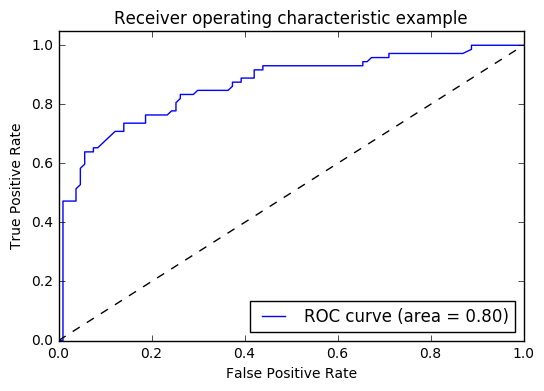

In [331]:
# Plot ROC curve for logistic regression model
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logReg_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()